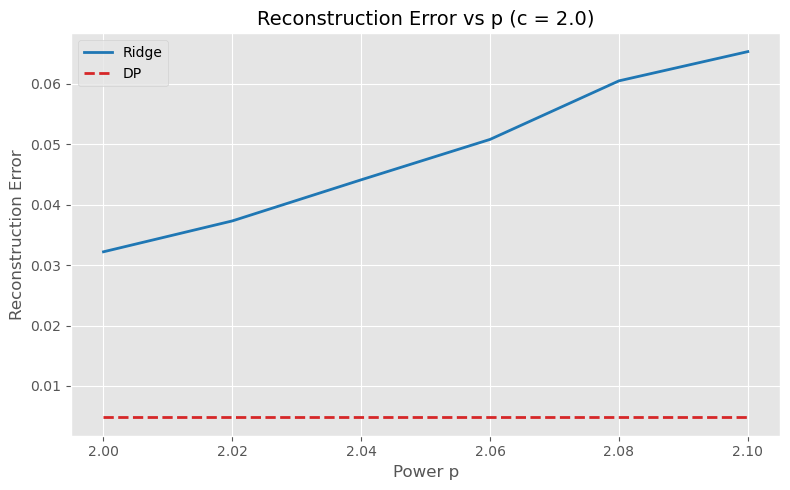

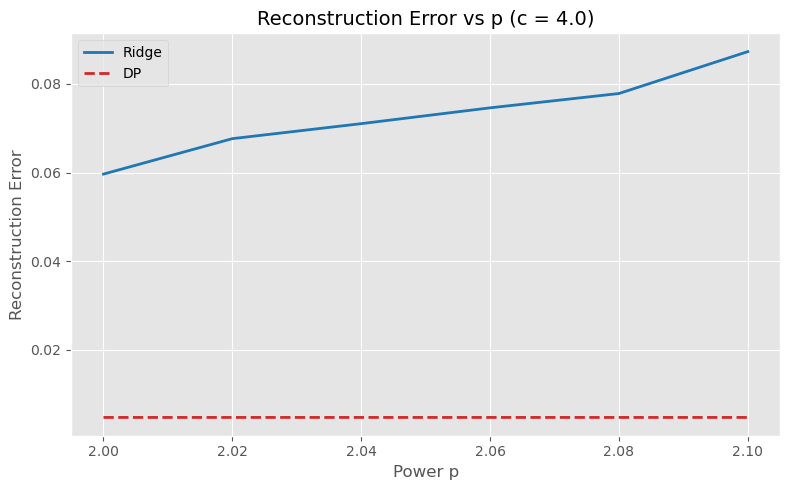

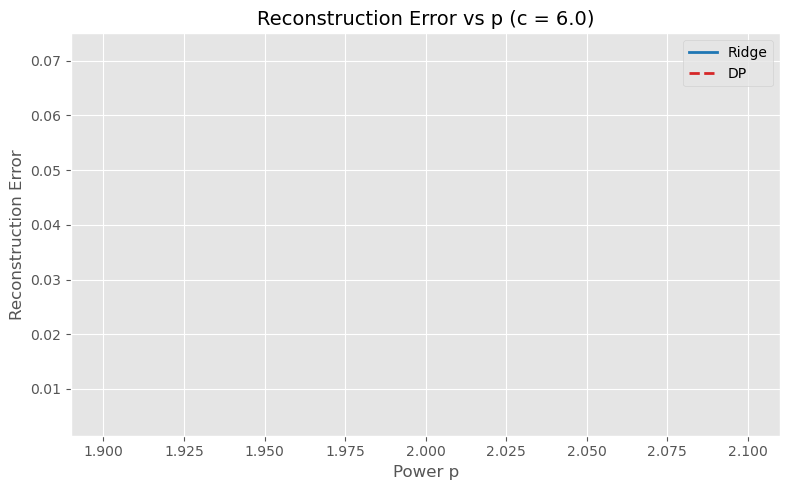

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import re

# --- Setup ---
results_dir = "/home/sagnik/Research/DP_transformer/results"
plot_dir = "/home/sagnik/Research/DP_transformer/plots"
os.makedirs(plot_dir, exist_ok=True)

# --- Load all CSVs ---
csv_files = sorted(glob.glob(os.path.join(results_dir, "result_p*_c*.csv")))

records = []

for file in csv_files:
    match = re.search(r"result_p([0-9.]+)_c([0-9.]+)\.csv", os.path.basename(file))
    if match:
        p_val = float(match.group(1))
        c_val = float(match.group(2))
        df = pd.read_csv(file)
        for _, row in df.iterrows():
            records.append({
                "p": p_val,
                "c": c_val,
                "alpha": float(row["alpha"]),
                "err_ridge": float(row["err_ridge"]),
                "err_dp": float(row["err_dp"])
            })

df_all = pd.DataFrame(records)

# --- Save combined results (optional) ---
df_all.to_csv(os.path.join(results_dir, "combined_dp_results.csv"), index=False)

# --- Plot Error vs p for each fixed c ---
plt.style.use("ggplot")

# Styling for both methods
method_to_style = {
    "err_ridge": {"label": "Ridge", "linestyle": "-", "color": "#1f77b4"},
    "err_dp": {"label": "DP", "linestyle": "--", "color": "#d62728"}
}

# Plot for each value of c
for c_val in sorted(df_all["c"].unique()):
    plt.figure(figsize=(8, 5))
    df_c = df_all[df_all["c"] == c_val]

    for method in ["err_ridge", "err_dp"]:
        sub = df_c.sort_values("p")
        plt.plot(
            sub["p"], sub[method],
            label=method_to_style[method]["label"],
            linestyle=method_to_style[method]["linestyle"],
            color=method_to_style[method]["color"],
            linewidth=2
        )

    plt.title(f"Reconstruction Error vs p (c = {c_val})", fontsize=14)
    plt.xlabel("Power p", fontsize=12)
    plt.ylabel("Reconstruction Error", fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"error_vs_p_c{c_val}.png"), dpi=150)
    plt.show()